Processing ../computing/dataset/ppmi/60_70/control/stats/graph_statistics.csv...


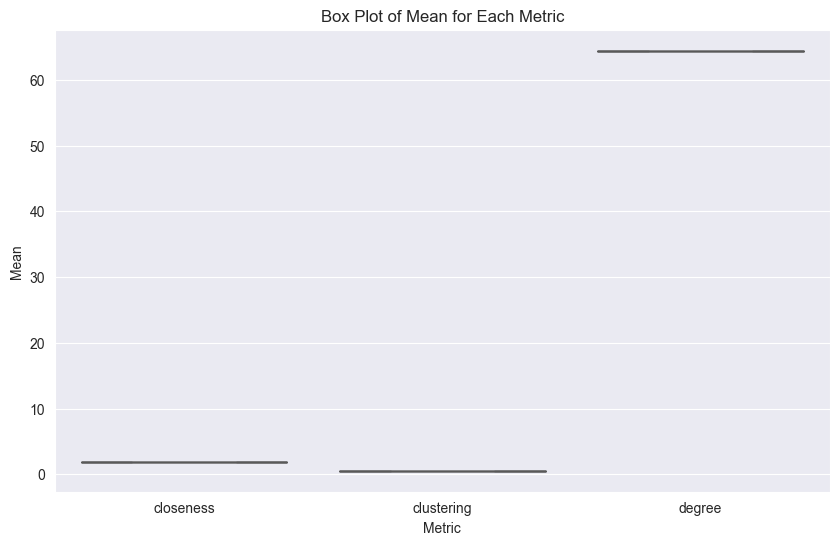

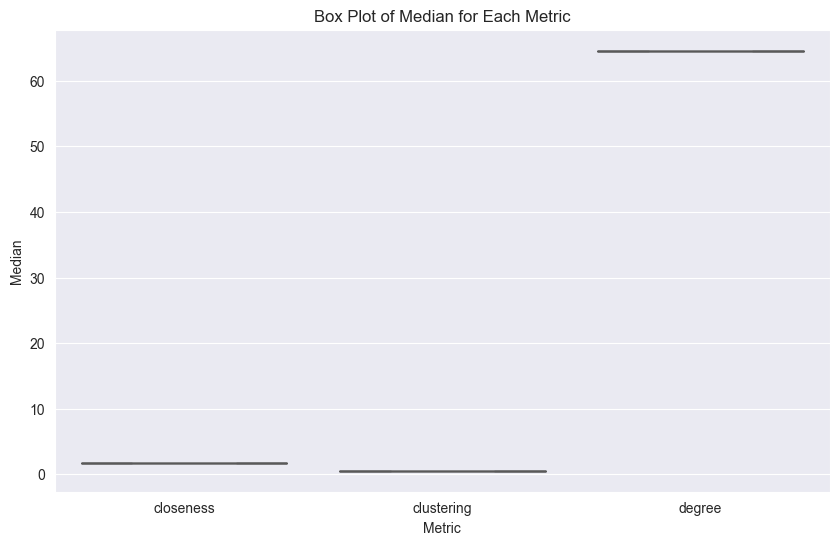

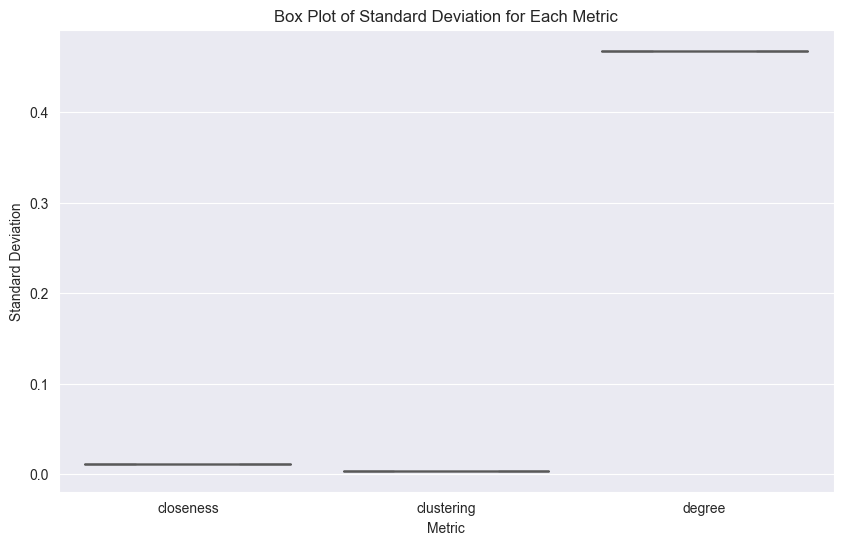

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data from a CSV file
def load_data(file_path):
    return pd.read_csv(file_path)

# Plot a box plot for each metric (Mean, Median, and Standard Deviation)
def plot_boxplot(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))

    # Plot the box plot with 'Metric' as the hue and palette for color
    sns.boxplot(data=data, x='Metric', y=column, hue='Metric', palette='Set2', notch=True, legend=False)

    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.show()

# Function to process the graph_differences.csv file and return the data
def process_graph_differences_file(file_path):
    data = load_data(file_path)

    # Check if the necessary columns exist in the file
    if 'Metric' not in data.columns or 'Mean' not in data.columns or 'Median' not in data.columns or 'Standard Deviation' not in data.columns:
        print(f"Warning: Missing columns in {file_path}. Skipping this file.")
        return None

    return data

# Main function to visualize data from the specified graph_differences.csv file
def visualize_graph_differences(file_path):
    # Check if the file exists
    if os.path.exists(file_path):
        print(f"Processing {file_path}...")

        # Process the file and load data
        data = process_graph_differences_file(file_path)
        if data is not None:
            # Plot the box plot for Mean, Median, and Standard Deviation for each metric
            for column in ['Mean', 'Median', 'Standard Deviation']:
                plot_boxplot(data, column, f'Box Plot of {column} for Each Metric', 'Metric', column)
        else:
            print("No valid data found to visualize.")
    else:
        print(f"File {file_path} not found.")

# Example usage: specify the path of the graph_differences.csv file
visualize_graph_differences('../computing/dataset/ppmi/60_70/control/stats/graph_statistics.csv')  # Replace with the actual file path
